## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [5]:
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,svr,scaling=False))

{'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}


In [4]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_PCA_dataset.csv', PATH, svr, cv=cv, scaling=False)

NSC
neg_mean_absolute_percentage_error
	mean: 0.35687031775871575	 std:0.11203022864172442


NSC
neg_root_mean_squared_error
	mean: 18.16390533662396	 std:6.293696741619444


GL
neg_mean_absolute_percentage_error
	mean: 0.2543963895328217	 std:0.051190259041794695


GL
neg_root_mean_squared_error
	mean: 4.781453874238427	 std:1.5297921558061638


PEP
neg_mean_absolute_percentage_error
	mean: 0.15696718065581866	 std:0.03704223649238568


PEP
neg_root_mean_squared_error
	mean: 4.933914798090466	 std:1.5313199015957795


BDX
neg_mean_absolute_percentage_error
	mean: 0.3205634391933201	 std:0.0788165394072663


BDX
neg_root_mean_squared_error
	mean: 10.715596380041086	 std:2.6608124946261396


IBM
neg_mean_absolute_percentage_error
	mean: 0.3478509896027926	 std:0.10937801293082858


IBM
neg_root_mean_squared_error
	mean: 11.298486277457874	 std:1.3954746817444992


MEAN MAPE: 0.28732966334869375
	 STD: 0.07769145530279993
MEAN RMSE: 9.978671333290363
	 STD: 2.6822191950784053


## 2.2 Scaled y dataset evaluation

In [5]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,svr,scaling=True))

{'C': 5, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}


In [6]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 5, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_PCA_dataset.csv', PATH, svr, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.6122868399899744	 std:0.29759068496947566


NSC
neg_root_mean_squared_error
	mean: 0.43375570698088933	 std:0.19221901276169195


GL
neg_mean_absolute_percentage_error
	mean: 0.524331299477829	 std:0.2207965538425747


GL
neg_root_mean_squared_error
	mean: 0.38474282616418126	 std:0.3662215811100094


PEP
neg_mean_absolute_percentage_error
	mean: 0.45082272985074284	 std:0.2771756787708101


PEP
neg_root_mean_squared_error
	mean: 0.17207564737059236	 std:0.04980675279268478


BDX
neg_mean_absolute_percentage_error
	mean: 0.4920963114703996	 std:0.1479274461226496


BDX
neg_root_mean_squared_error
	mean: 0.30681941571645066	 std:0.28447851979725597


IBM
neg_mean_absolute_percentage_error
	mean: 0.7908097686434727	 std:0.3732145741446806


IBM
neg_root_mean_squared_error
	mean: 0.2720752519861637	 std:0.05593603332888513


MEAN MAPE: 0.5740693898864837
	 STD: 0.26334098757003815
MEAN RMSE: 0.31389376964365545
	 STD: 0.18973237995810546


## 3.0 Model testing settings

In [7]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_PCA_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

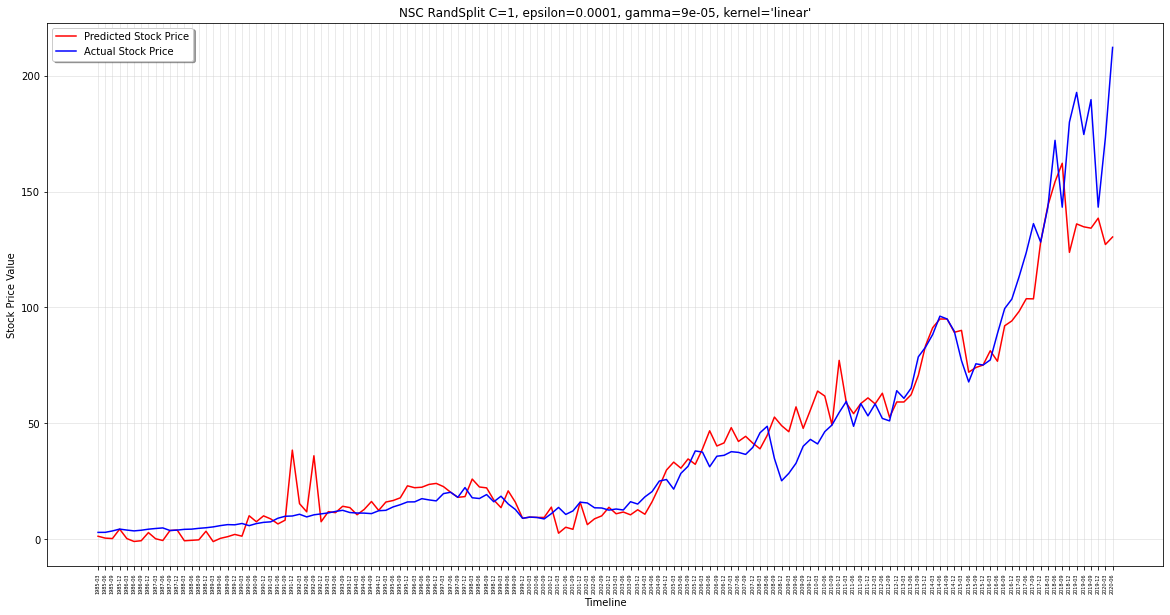

NSC MODEL RESULTS
 RMSE
 	Test: 13.743360720254923
 MAPE
 	Test: 0.4935287624305085
 MAE
 	Test: 8.249034143486364
 R2 Score Adj
 	Test: 0.7985150162035131



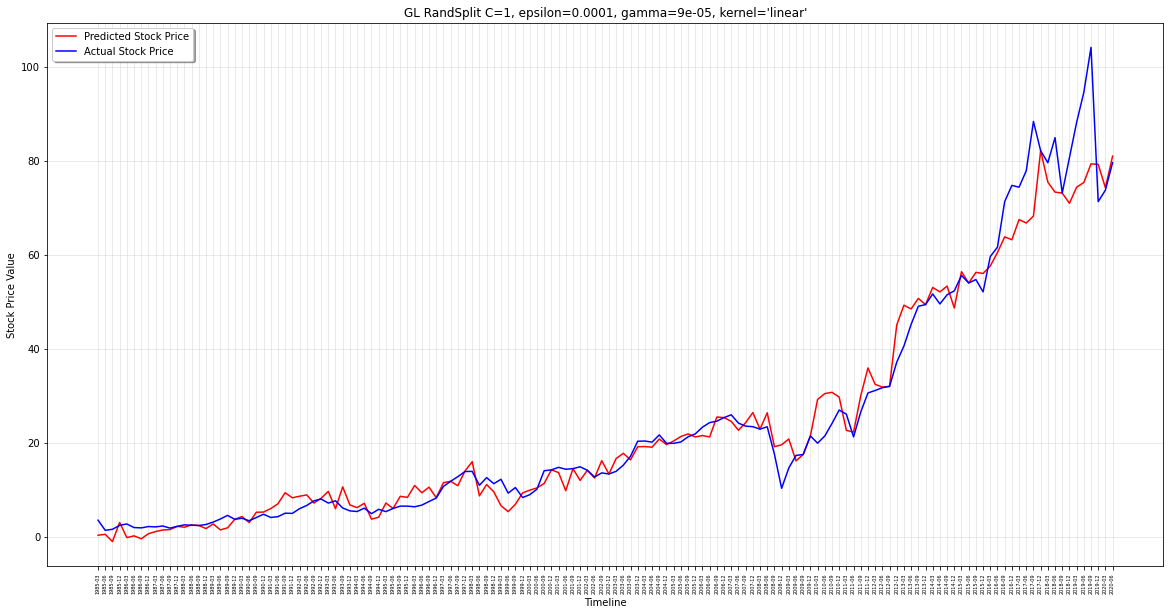

GL MODEL RESULTS
 RMSE
 	Test: 5.167186008061318
 MAPE
 	Test: 0.34948619563111927
 MAE
 	Test: 3.852602527654884
 R2 Score Adj
 	Test: 0.903356988389832



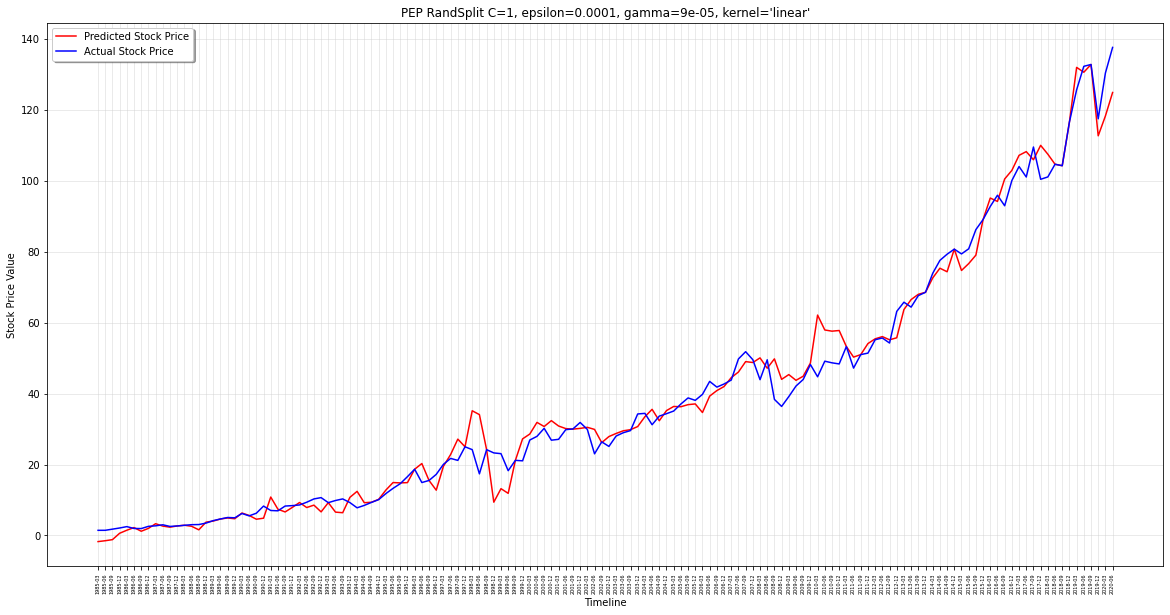

PEP MODEL RESULTS
 RMSE
 	Test: 4.96312462297969
 MAPE
 	Test: 0.29574691563711447
 MAE
 	Test: 3.4277407798323085
 R2 Score Adj
 	Test: 0.9533716339397507



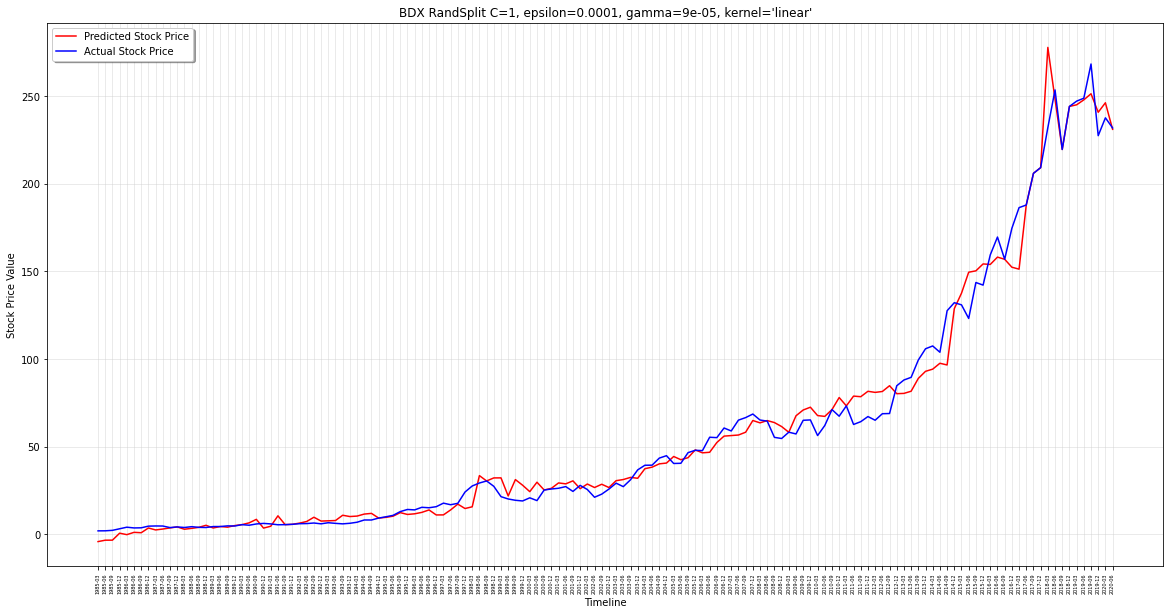

BDX MODEL RESULTS
 RMSE
 	Test: 10.9735645803295
 MAPE
 	Test: 0.4398493360319893
 MAE
 	Test: 6.521523284994707
 R2 Score Adj
 	Test: 0.9399967812483992



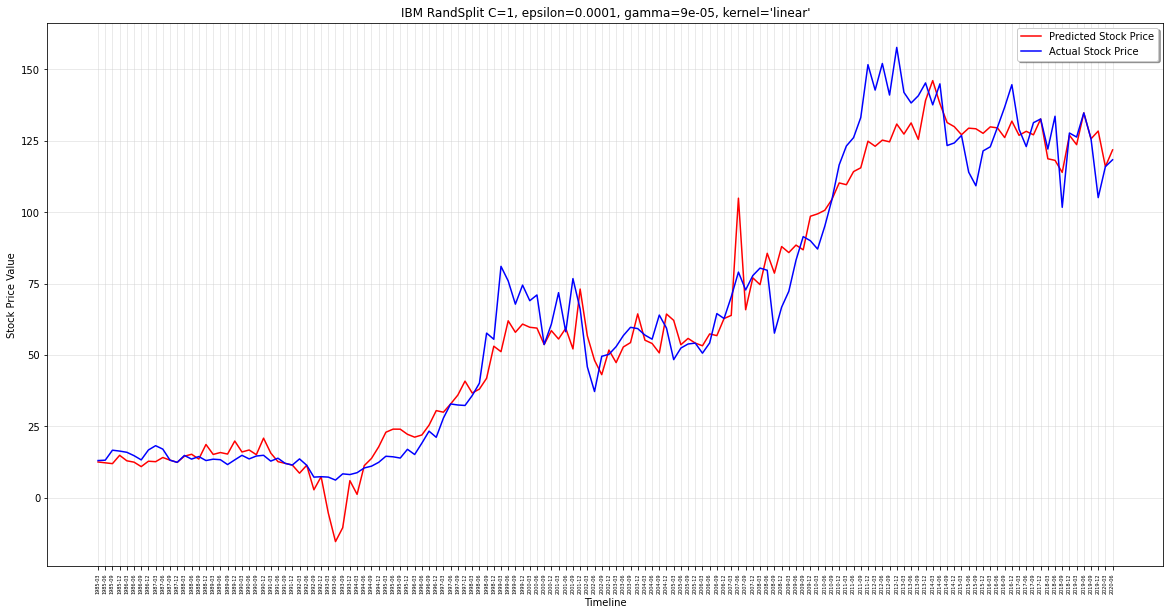

IBM MODEL RESULTS
 RMSE
 	Test: 12.213090230724328
 MAPE
 	Test: 0.2527085977384807
 MAE
 	Test: 8.853887330660486
 R2 Score Adj
 	Test: 0.891563012170483



In [8]:
from lib.fundamental_lib import model_results_revised
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], svr, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

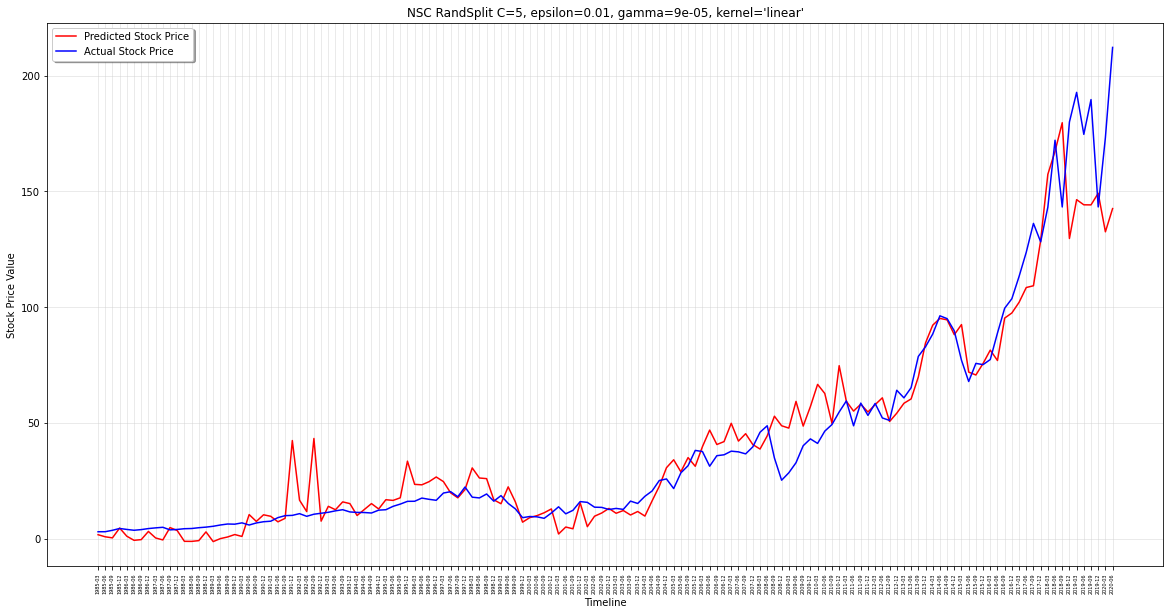

NSC MODEL RESULTS
 RMSE
 	Test: 13.510539258714761
 MAPE
 	Test: 0.5415899701062387
 MAE
 	Test: 8.964076884272446
 R2 Score Adj
 	Test: 0.8052837660268104



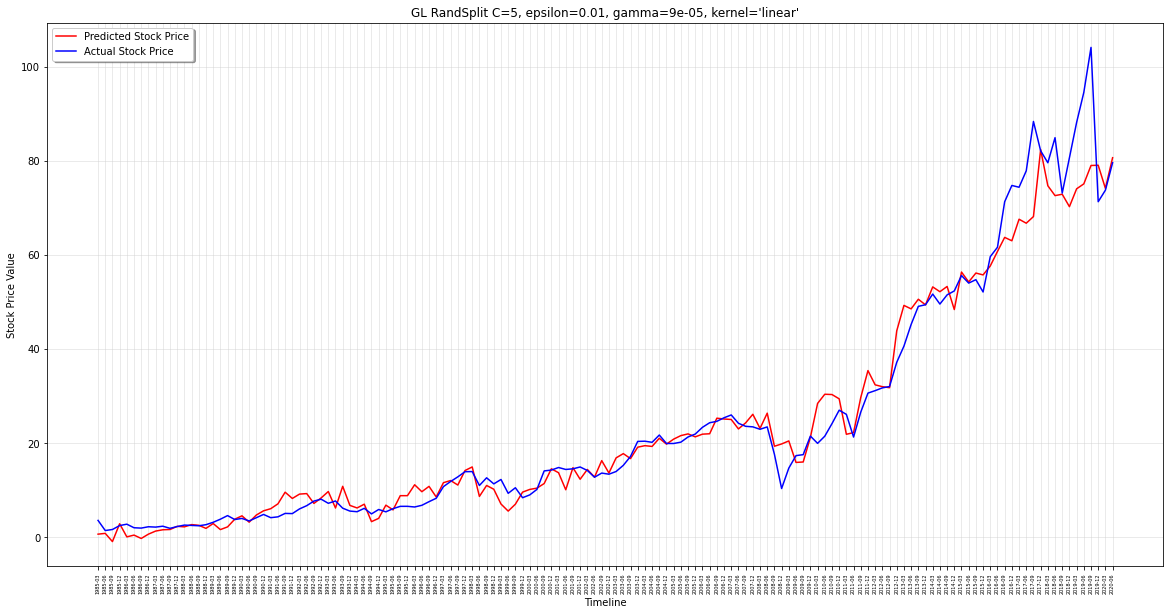

GL MODEL RESULTS
 RMSE
 	Test: 5.084644450058873
 MAPE
 	Test: 0.34025327045887327
 MAE
 	Test: 3.7922912011003804
 R2 Score Adj
 	Test: 0.906419913240222



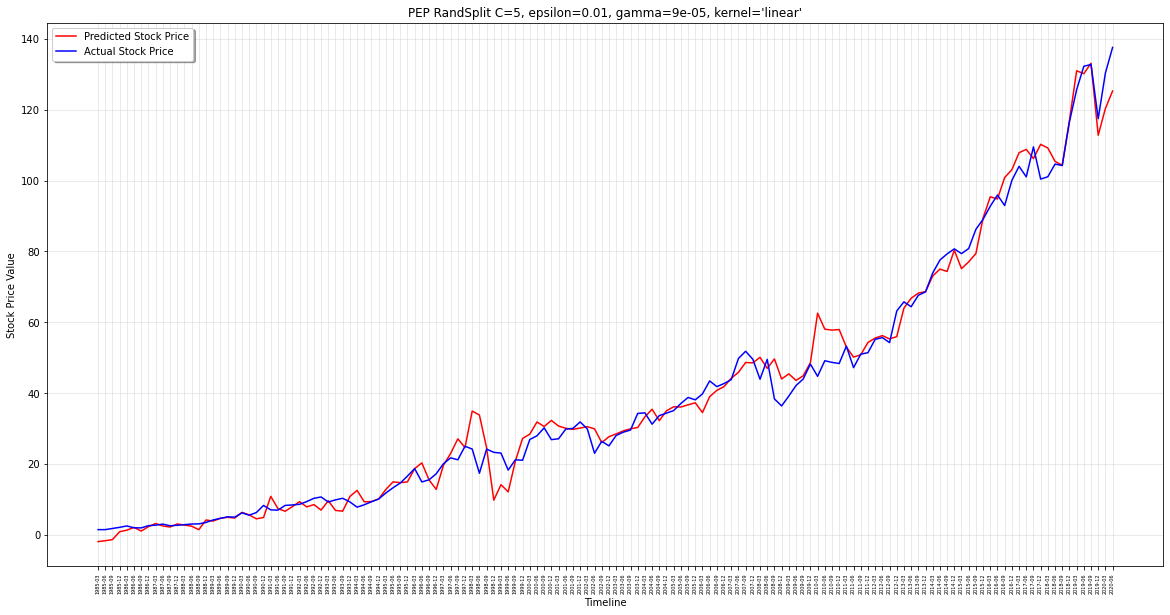

PEP MODEL RESULTS
 RMSE
 	Test: 4.999737538773558
 MAPE
 	Test: 0.30656934930966745
 MAE
 	Test: 3.4553053721117863
 R2 Score Adj
 	Test: 0.9526811425377505



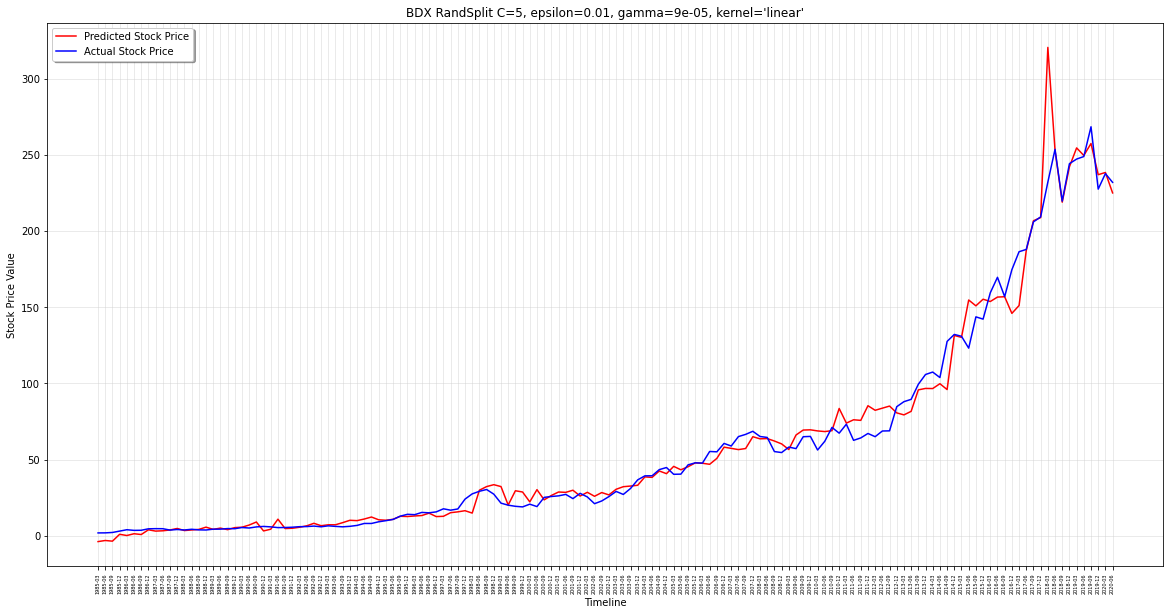

BDX MODEL RESULTS
 RMSE
 	Test: 18.217463809210475
 MAPE
 	Test: 0.4084413910703616
 MAE
 	Test: 8.183793458916682
 R2 Score Adj
 	Test: 0.8346306836395329



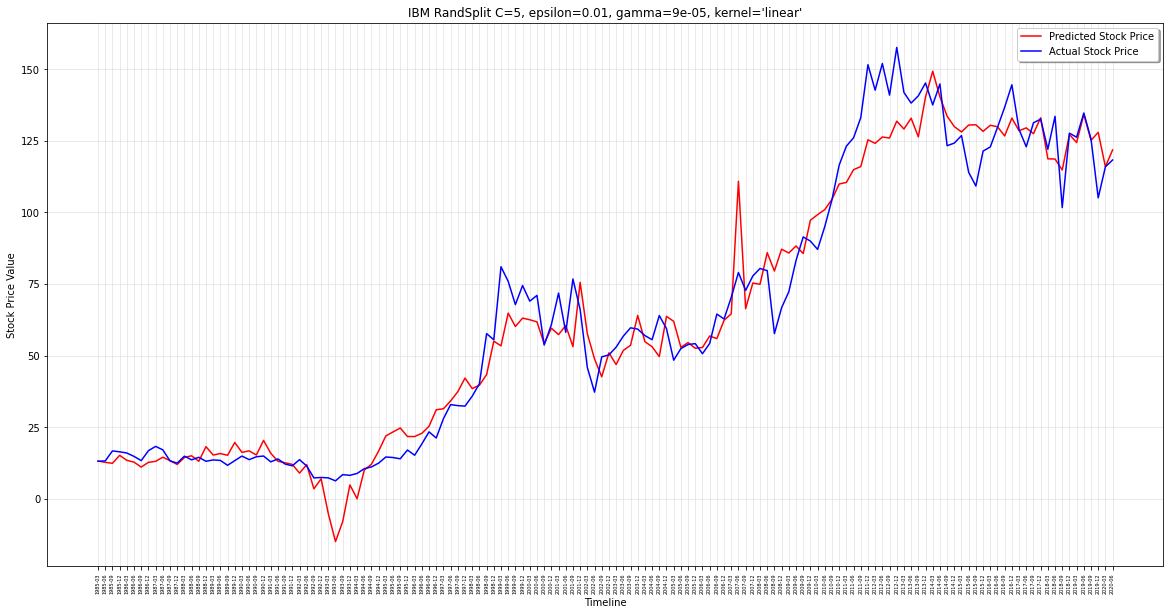

IBM MODEL RESULTS
 RMSE
 	Test: 11.483801554244337
 MAPE
 	Test: 0.23790109868258916
 MAE
 	Test: 8.35079902230191
 R2 Score Adj
 	Test: 0.9041267009429753



In [9]:
from lib.fundamental_lib import model_results_revised
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 5, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], svr, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=False, manual=True)

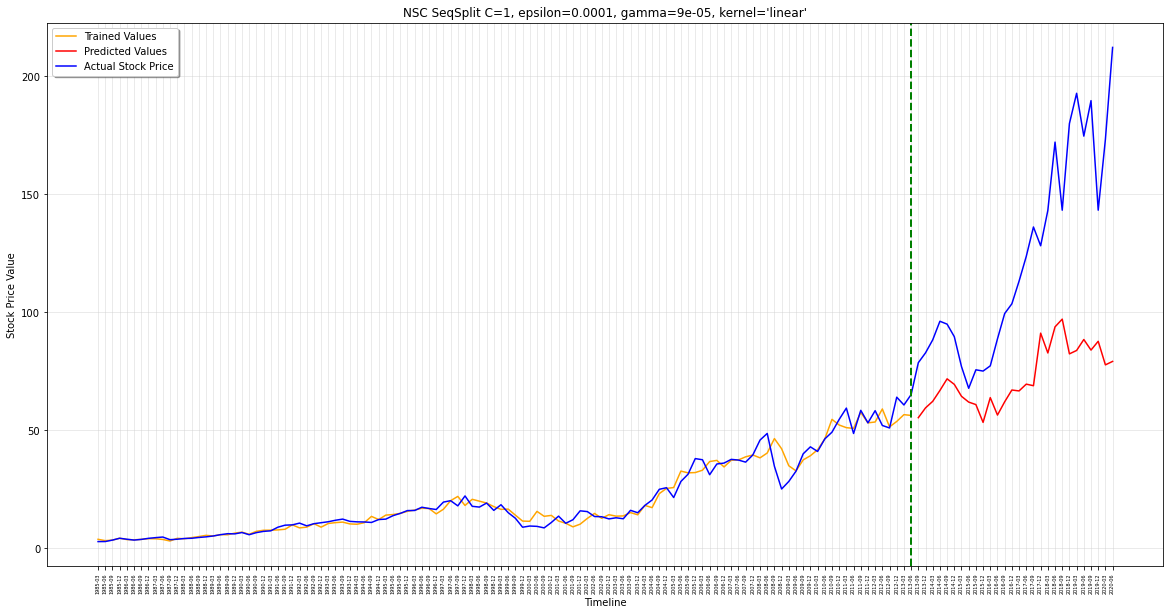

NSC MODEL RESULTS
 RMSE
 	Train: 3.5015452171218913
 	Test: 64.86379872680821
 	Dataset: 29.37695597158189
 MAPE
 	Train: 0.1074887245164596
 	Test: 0.37275434043088
 	Dataset: 0.16128384942218124
 R2 Score Adj
 	Train: 0.9484546568705721
 	Test: -3.1595171776135835
 	Dataset: 0.6060150638835906



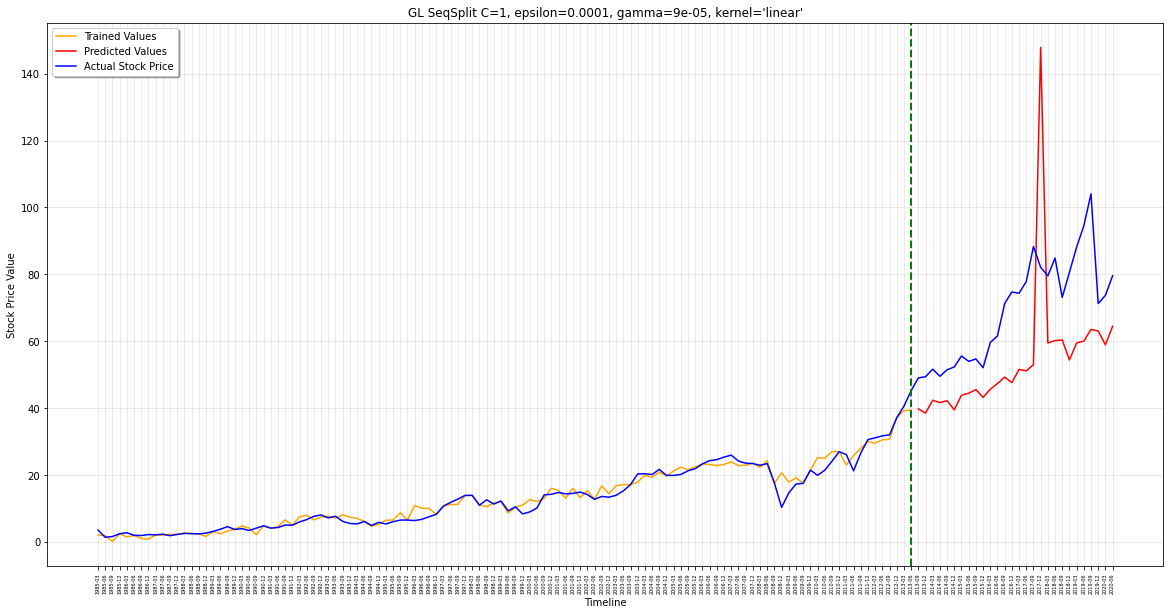

GL MODEL RESULTS
 RMSE
 	Train: 1.9296592280098346
 	Test: 23.646410978805143
 	Dataset: 10.78717137369773
 MAPE
 	Train: 0.14139565546244862
 	Test: 0.2693569150866158
 	Dataset: 0.16734584098063637
 R2 Score Adj
 	Train: 0.9522591725252124
 	Test: -3.8378325510712363
 	Dataset: 0.7983622620846965



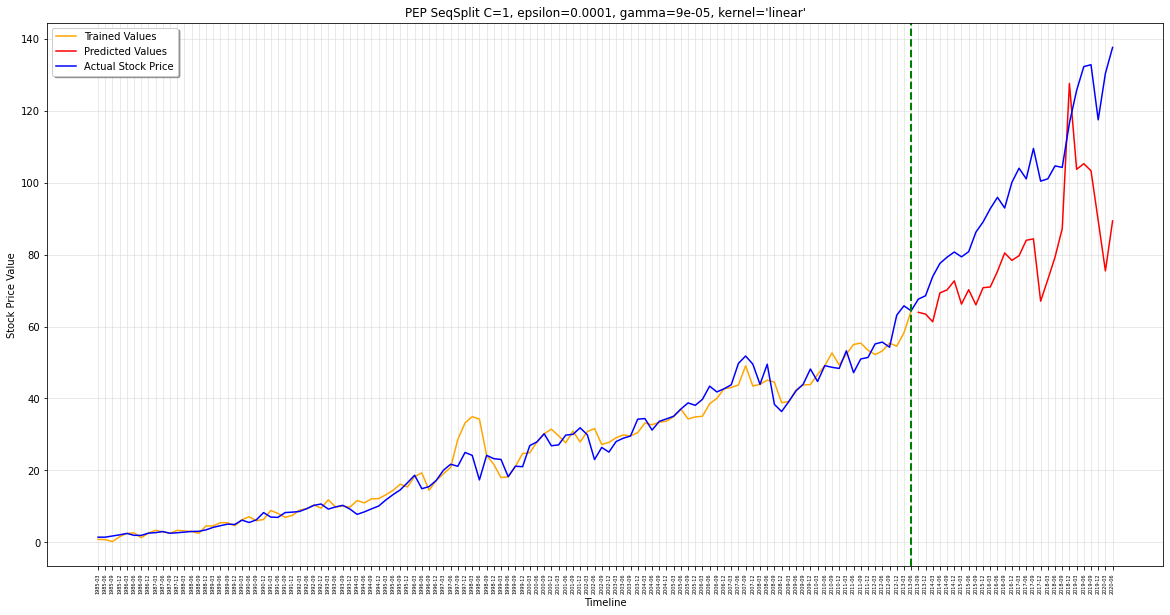

PEP MODEL RESULTS
 RMSE
 	Train: 3.39202493501993
 	Test: 25.059722316372756
 	Dataset: 11.68447831058754
 MAPE
 	Train: 0.12441501958427156
 	Test: 0.20178009736039873
 	Dataset: 0.1401044409514582
 R2 Score Adj
 	Train: 0.9575928697695819
 	Test: -1.951036002548725
 	Dataset: 0.881361731565285



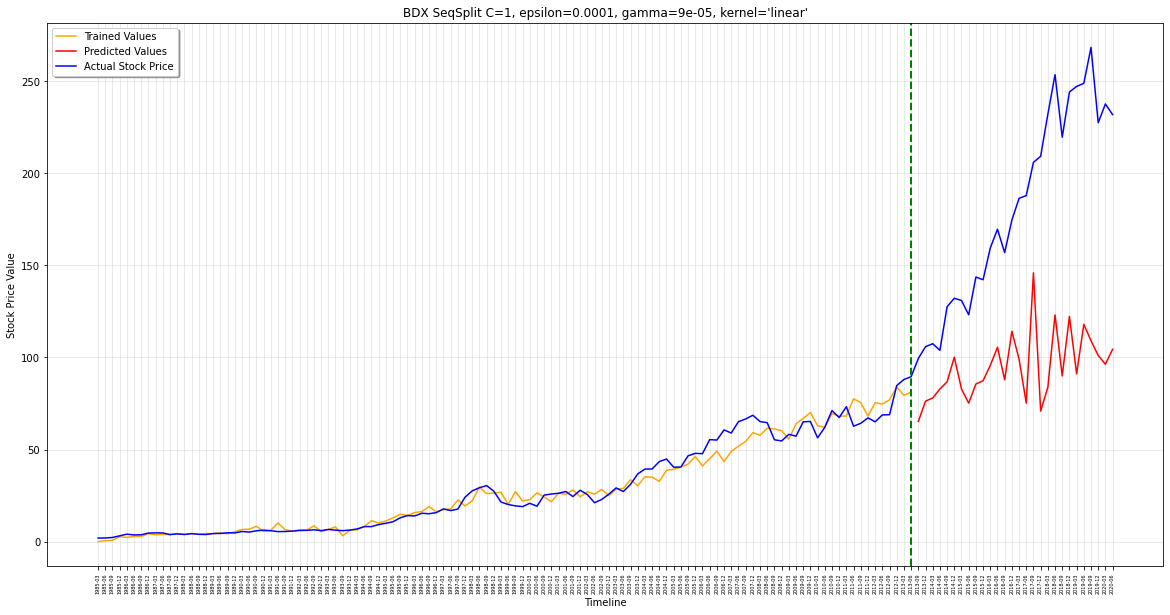

BDX MODEL RESULTS
 RMSE
 	Train: 4.870825843341919
 	Test: 99.13710080162039
 	Dataset: 44.85574559687166
 MAPE
 	Train: 0.14873301819660376
 	Test: 0.44956340608403345
 	Dataset: 0.209740579376572
 R2 Score Adj
 	Train: 0.9550373904392633
 	Test: -6.452507750302342
 	Dataset: 0.5434112728192182



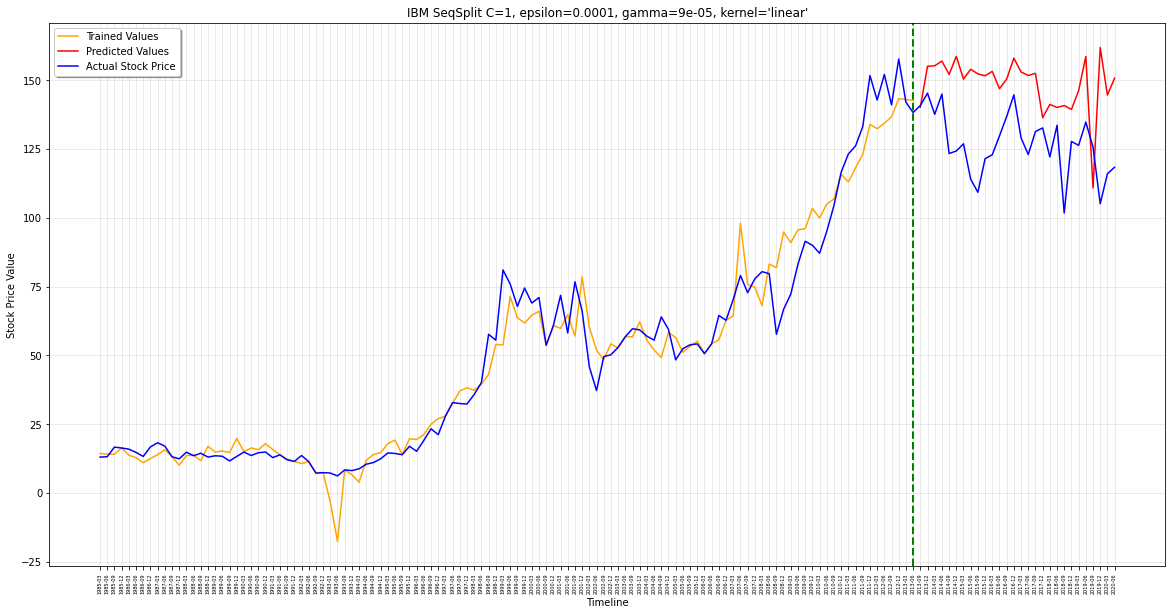

IBM MODEL RESULTS
 RMSE
 	Train: 8.388668513232917
 	Test: 26.183222231599427
 	Dataset: 13.968852774597796
 MAPE
 	Train: 0.16621459230069419
 	Test: 0.19130394312212395
 	Dataset: 0.1713026424672779
 R2 Score Adj
 	Train: 0.9475729750486539
 	Test: -11.395271246664244
 	Dataset: 0.9020197184724151



In [9]:
from lib.fundamental_lib import model_results_seq
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=True, manual=True)

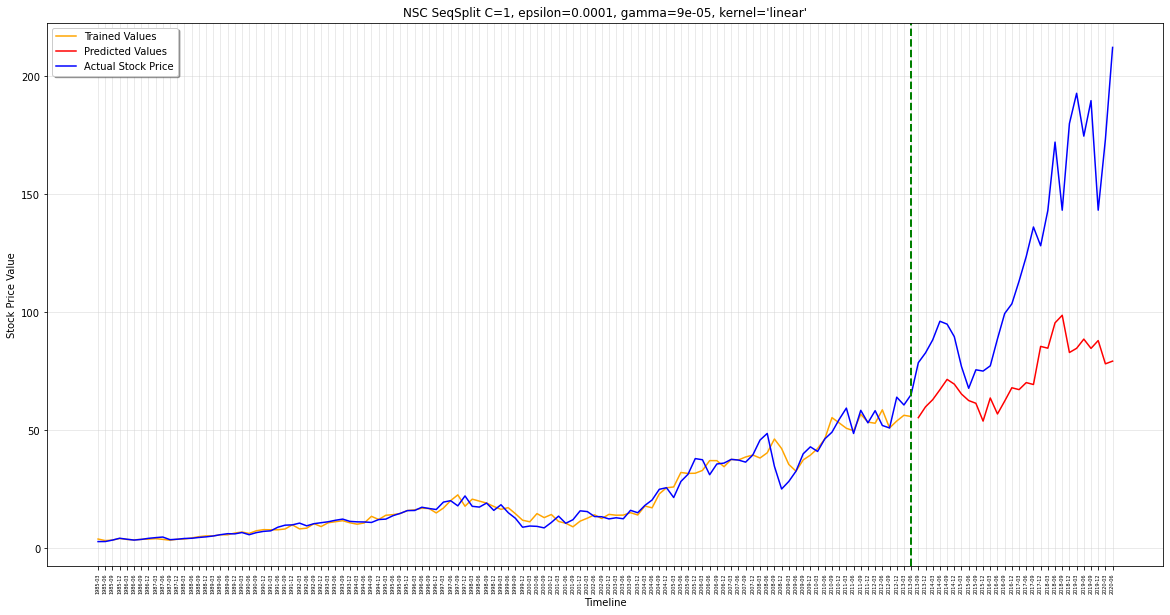

NSC MODEL RESULTS
 RMSE
 	Train: 3.514468854557929
 	Test: 64.52907235881781
 	Dataset: 29.22831563881781
 MAPE
 	Train: 0.106506638035357
 	Test: 0.3696416573269031
 	Dataset: 0.15986968390567052
 R2 Score Adj
 	Train: 0.9480734636448014
 	Test: -3.116697988559438
 	Dataset: 0.6099919154753408



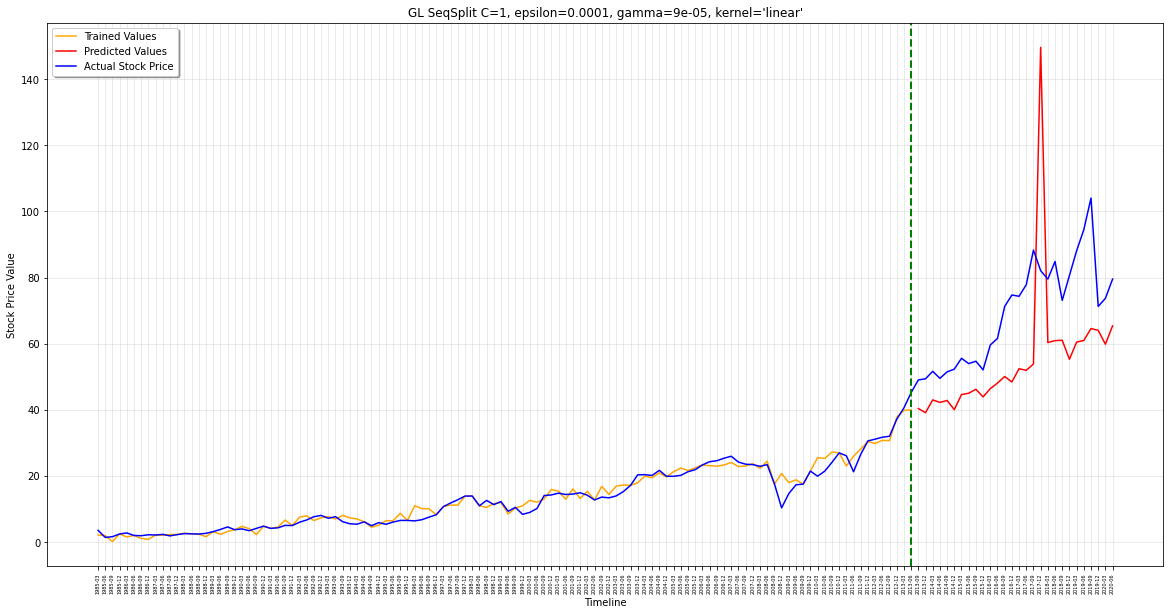

GL MODEL RESULTS
 RMSE
 	Train: 1.9306570768341895
 	Test: 23.196335039833844
 	Dataset: 10.587285093611072
 MAPE
 	Train: 0.14186217210955468
 	Test: 0.2590245493117397
 	Dataset: 0.16562237447922853
 R2 Score Adj
 	Train: 0.9522097851048972
 	Test: -3.6554226078962113
 	Dataset: 0.8057657219360426



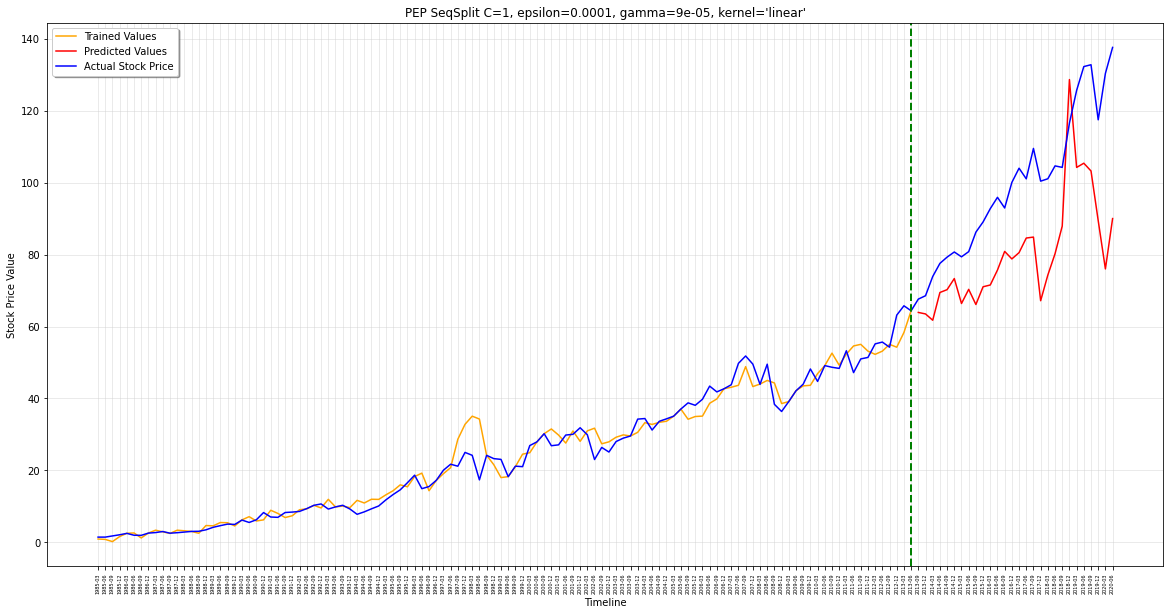

PEP MODEL RESULTS
 RMSE
 	Train: 3.3843075260183944
 	Test: 24.72067495149493
 	Dataset: 11.53527414679404
 MAPE
 	Train: 0.12490261069916903
 	Test: 0.19852520597380421
 	Dataset: 0.13983306708353557
 R2 Score Adj
 	Train: 0.9577856165063897
 	Test: -1.8717236685002256
 	Dataset: 0.8843722734541819



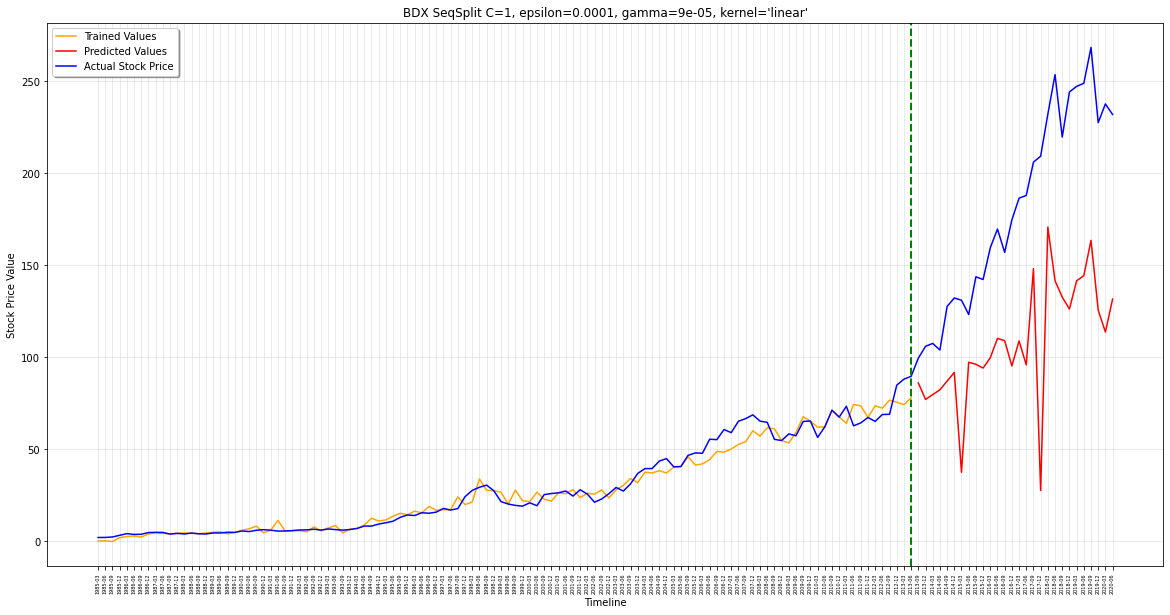

BDX MODEL RESULTS
 RMSE
 	Train: 4.745098348874641
 	Test: 82.82832905518704
 	Dataset: 37.53993211700649
 MAPE
 	Train: 0.15754357272453226
 	Test: 0.38548619032410125
 	Dataset: 0.20376969797199734
 R2 Score Adj
 	Train: 0.9573286146915931
 	Test: -4.202209148401976
 	Dataset: 0.6802018177319016



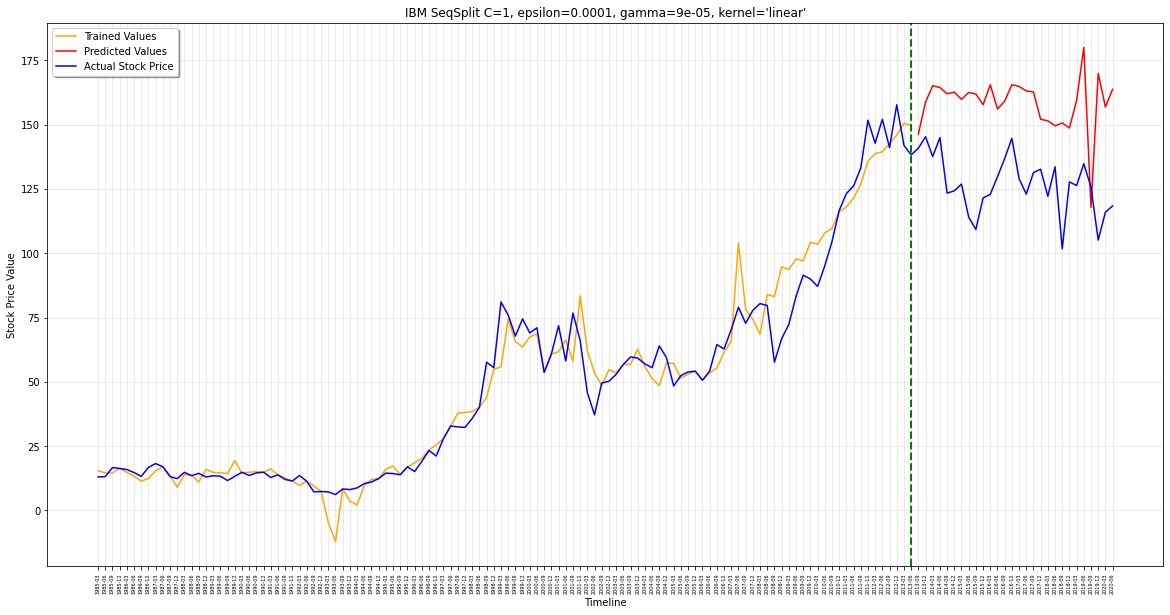

IBM MODEL RESULTS
 RMSE
 	Train: 8.4279536214585
 	Test: 35.22269699507618
 	Dataset: 17.556298847845156
 MAPE
 	Train: 0.15613369534722743
 	Test: 0.26617702147467415
 	Dataset: 0.17845017407237396
 R2 Score Adj
 	Train: 0.9470807815564498
 	Test: -21.431332073809763
 	Dataset: 0.8452313007510974



In [10]:
from lib.fundamental_lib import model_results_seq
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=True)